### Notebook structure

- **Instructions**: set of important informations to understand the structure of the code and how to make it work.
- **Excercise 02.1**: computing an integral using RNG and different sampling tecniques.
- **Excercise 02.2**: simulating discrete and continuous random walk.


## Instructions

Intruction to C++ compilation and executions .

- To compile the code run in the directory 'es_02.1' and 'es_02.2' the command :  `make`. 
- The code is divided into directories:
    - the directory 'random' contains all the files needed to use the RNG.
    - the directory 'utilities' contains files with userful functions and classes.
- To clear the files `.o`  and the executable please run `make clean`.
- The code generates output files in the  'output' directory.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from astropy import table
from astropy.io import ascii

import seaborn as sns  # Import Seaborn for enhancing data visualizations
sns.set_theme(style='whitegrid', palette='bright')  # Set Seaborn theme and color palette

## Excercise 02.1

We want to compute the integral
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
with Monte Carlo techniques. To do so we use four different methods, than we plot the estimation of $I$, $\langle g(x) \rangle_{p(x)}$, and its uncertainty as a function of the block number N. For every block $10^4$ throws are exectuted. 


In the context of Monte Carlo integration, $g(x)$ represents the function you want to integrate, and $p(x)$ is a probability density function  that you use to sample random points in the integration domain.
$$  I = \int g(x)  p(x)dx$$

The four methods we've implemented are as follows:

1) **Uniform Sampling**: This method is straightforward to implement but lacks precision since it assigns equal weight to regions of the domain, irrespective of the integrand's behavior:

$$
\begin{cases}
g(x) = \frac{\pi}{2}\cos\left(\frac{\pi x}{2}\right) & \\
p(x) = \mathrm{unif}(0,1)
\end{cases}
$$

2) **Exponential Sampling**: We explore this approach because the \(e^{-x}\) function is easily sampled using the inverse sampling method and closely follows the integrand's shape compared to the uniform pdf:

$$
\begin{cases}
g(x) =  \frac{\pi}{2} \frac{ \cos(\pi x/2) }{ e^{-x} } (1-e^{-1})\\
p(x) = \frac{e^{-x} }{(1-e^{-1})}
\end{cases}
$$

3) **Straight-Line Sampling**: Although a straight line with an intercept at (0,2) and slope of -2 provides an initial approximation of the integrand, sampling \(p(x)\) is computationally expensive as it necessitates the use of the accept/reject method within a rectangular box:

$$
\begin{cases}
g(x) =  \frac{\pi}{2} \frac{ \cos(\pi x/2) }{2-2x} \\
p(x) = 2-2x
\end{cases}
$$

4) **Parabolic Sampling**: This method approximates the integrand's shape well with a parabola having a vertex at (0,3/2) and zero at (1,0). Similar to the previous method, the challenge lies in the time-consuming sampling process though the accept/reject algorithm:

$$
\begin{cases}
g(x) =  \frac{\pi}{3} \frac{ \cos(\pi x/2) }{1-x^2} \\
p(x) = \frac{3}{2}(1-x^2)
\end{cases}
$$

These methods provide different strategies to estimate the integral, each with its own trade-offs in terms of computational efficiency and accuracy. Our primary focus lies in examining the behavior of the integral uncertainty, a quantity closely linked to the choice of the sampling probability density function $p(x)$. As per the principles of importance sampling, we anticipate that the more closely $p(x)$ resembles the integrand of interest, the lower we can expect the uncertainty to be. 




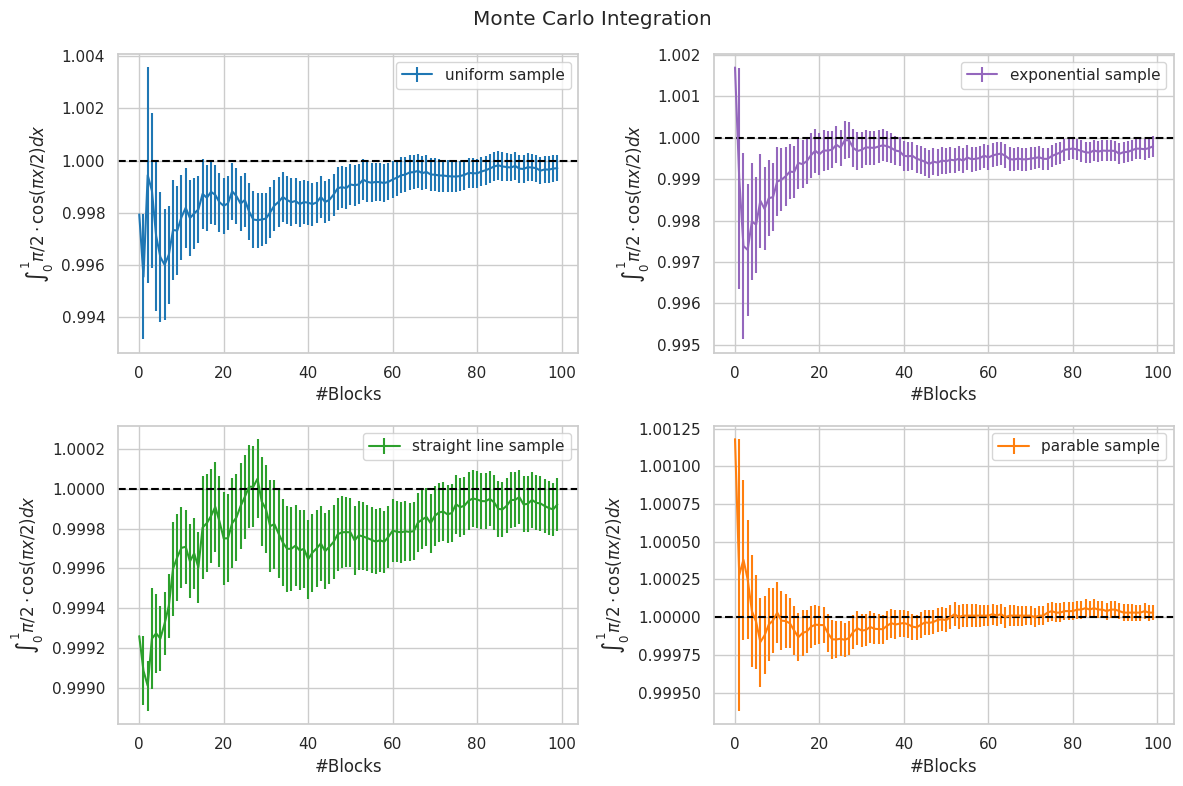

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

N = 100     # Number of blocks
L = 10000   # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)   # Calculate the total number of throws for each block

# Read the data from the files using Astropy's ascii module
file_names = ['es_02.1/output/es02_1u.dat', 'es_02.1/output/es02_1e.dat', 'es_02.1/output/es02_1l.dat', 'es_02.1/output/es02_1p.dat']

# Labels for the legend
labels = ['uniform', 'exponential', 'straight line', 'parable']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.suptitle("Monte Carlo Integration")

for i, file_name in enumerate(file_names):
    df = ascii.read(file_name)
    ave = df['comulative_averages']
    yerr = df['uncertainty']
    
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    
    axs[row, col].errorbar(x, ave, yerr, color=f"tab:{'blue' if i == 0 else 'purple' if i == 1 else 'green' if i == 2 else 'orange'}", 
                ecolor=f"tab:{'blue' if i == 0 else 'purple' if i == 1 else 'green' if i == 2 else 'orange'}", label=labels[i]+" sample")
    axs[row, col].set_ylabel('$\int_0^1 {\pi}/{2}\cdot\cos(\pi x/2) dx $')
    axs[row, col].legend()
    axs[row, col].grid(True)
    axs[row, col].axhline(y=1, linestyle="--", color='black')
    axs[row, col].set_xlabel('#Blocks') 


plt.tight_layout()  # Ensure proper spacing
plt.show()



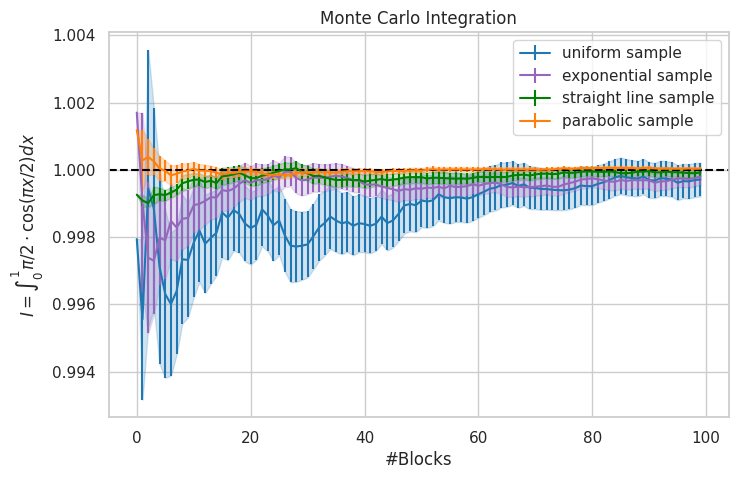

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

N = 100     # Number of blocks
L = 10000   # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)  # Create an array of indices [0,1,2,...,N-1]

# Define file names and labels
file_labels = [
    ('es_02.1/output/es02_1u.dat', 'tab:blue', 'uniform sample'),
    ('es_02.1/output/es02_1e.dat', 'tab:purple', 'exponential sample'),
    ('es_02.1/output/es02_1l.dat', 'green', 'straight line sample'),
    ('es_02.1/output/es02_1p.dat', 'tab:orange', 'parabolic sample')
]

# Create subplots
plt.figure(figsize=(8, 5))

for file_name, color, label in file_labels:
    df = ascii.read(file_name)
    ave = df['comulative_averages']
    yerr = df['uncertainty']

    plt.errorbar(x, ave, yerr, color=color, ecolor=color, label=label)
    plt.fill_between(x, ave - yerr, ave + yerr, alpha=0.2, color=color)

plt.axhline(y=1, linestyle="--", color='black')

# Adding labels, grid, and reference line
plt.title("Monte Carlo Integration")
plt.xlabel('#Blocks')
plt.ylabel('$I=\int_0^1 {\pi}/{2}\cdot\cos(\pi x/2) dx $')
plt.legend()
plt.style.use(style='ggplot')
plt.grid(True)

# Display the plot
plt.show()



As expected, the function that closely resembles the integrand, the parabola, provides the best results with the smallest uncertainty. In fact, it's evident that the degree of resemblance between the various functions and the integrand directly influences the quality of the outcomes.

## Excercise 02.2

In this exercise, we explore two different types of random walks (RWs) and compare their behaviors. The two types are:

- Random Walk on a Cubic Lattice:
The walker is on a cubic lattice with a lattice constant of $a=1$.
At each discrete time step, the walker makes a forward or backward step of length equal to $a$ in one of the three principal directions of the lattice: $x$, $y$, or $z$.

- Random Walk in the Continuum:
The walker is in the continuum.
At each discrete time step, the walker makes a step of length equal to $a$ (in this case, $a=1$) along a random direction obtained by sampling uniformly from the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$.

We want to investigate the behavior of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both types of random walks as a function of the step $i \in [0,10^2]$, where $N$ represents the number of steps.

To obtain reliable results, we divided the total number of throws ($M$) into several blocks. For each block, we computed $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as a function of the step $i$.

For each type of random walk, we then obtained the average value and its statistical uncertainty for fixed $i$. We also performed a curve fitting analysis using the function $f(N) = k\sqrt{N}$ to see if the results indicate a diffusive behavior.

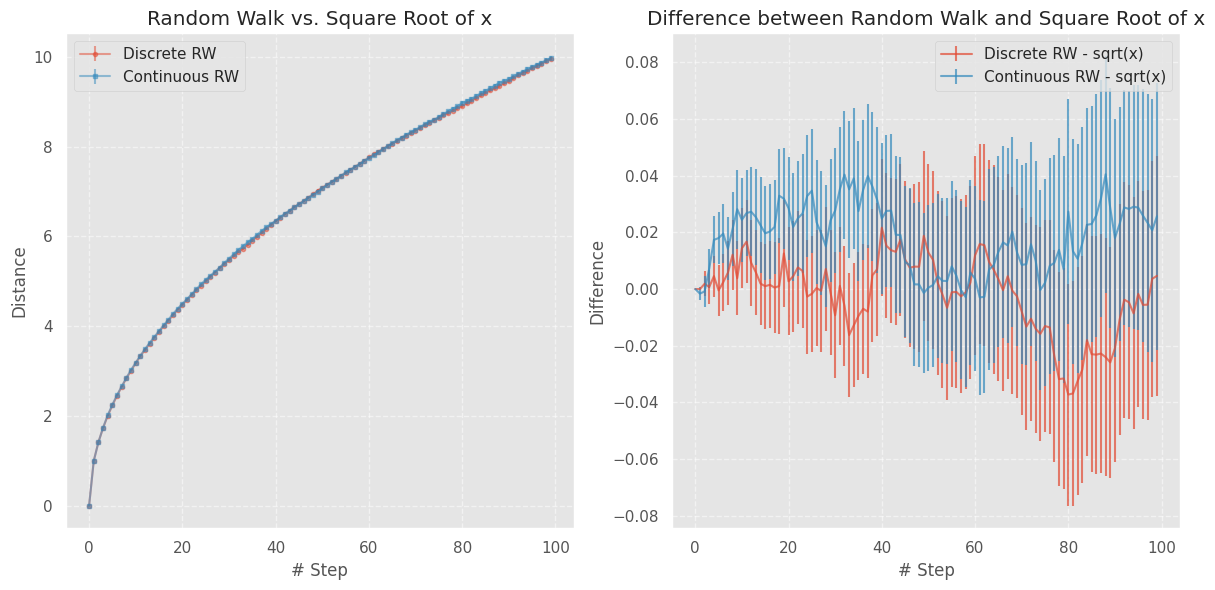

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

# Carica i dati dai file
df_disc = ascii.read('es_02.2/output/es02_2d.dat')
df_cont = ascii.read('es_02.2/output/es02_2c.dat')

# Estrai i dati
disc, err_disc = df_disc['comulative_averages'], df_disc['uncertainty']
cont, err_cont = df_cont['comulative_averages'], df_cont['uncertainty']

Nstep = 100
x = np.arange(Nstep)
y = np.sqrt(x)

# Grafico 1: Random Walk e Radice Quadrata di x
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(x,disc, yerr=err_disc, alpha=0.5, label='Discrete RW', fmt='o', linestyle='-', markersize=3)
plt.errorbar(x,cont, yerr=err_cont, alpha=0.5, label='Continuous RW', fmt='s', linestyle='-', markersize=3)
plt.xlabel('# Step')
plt.ylabel('Distance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Random Walk vs. Square Root of x')

# Grafico 2: Differenza tra Random Walk e Radice Quadrata di x
plt.subplot(1, 2, 2)
plt.errorbar(x,disc - y,yerr=err_disc, label='Discrete RW - sqrt(x)', alpha=0.7)
plt.errorbar(x,cont - y,yerr=err_cont, label='Continuous RW - sqrt(x)', alpha=0.7)
plt.ylabel('Difference')
plt.xlabel('# Step')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Difference between Random Walk and Square Root of x')

plt.tight_layout()
plt.show()


The previous graphs display, at the left $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both random walks as a function of the step $i$, and at the right the same resulted escalated by a factor $\sqrt{N}$ to better observe the deviation and the error bar. As observed from the graphs, both types of random walks exhibit diffusive behavior, where the root mean square distance $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ increases with the square root of the number of steps, i.e., $\sqrt{N}$. The statistical uncertainties were obtained by considering multiple blocks of data, and they are shown as error bars in the graphs.


Random walk in a cubic lattice - Optimized parameter a: 0.994, Parameter uncertainty: 0.0
Random walk in 3D space - Optimized parameter a: 0.997, Parameter uncertainty: 0.0


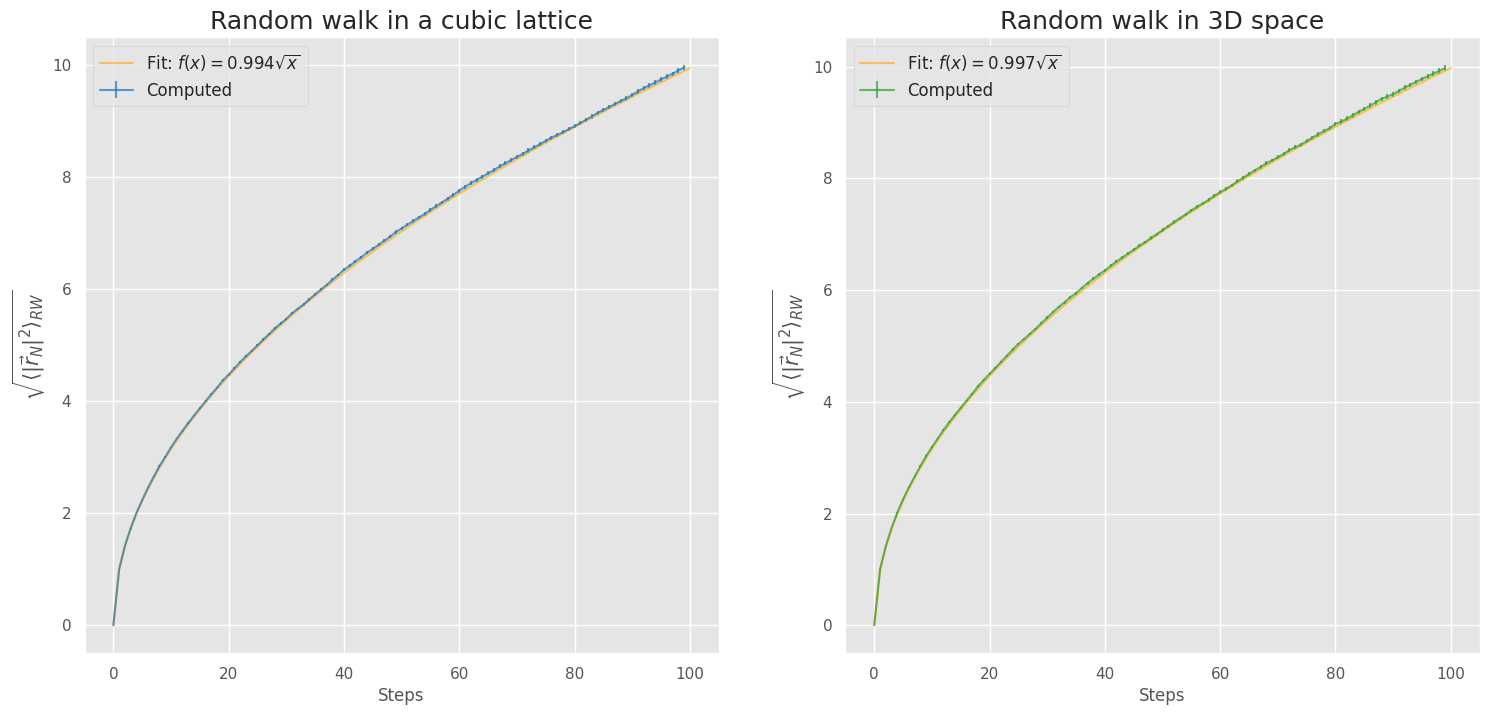

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.io import ascii

# Load data from files
df_disc = ascii.read('es_02.2/output/es02_2d.dat')
df_cont = ascii.read('es_02.2/output/es02_2c.dat')

# Extract data
disc, err_disc = df_disc['comulative_averages'], df_disc['uncertainty']
cont, err_cont = df_cont['comulative_averages'], df_cont['uncertainty']

# Create figure and subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 8))

# Plot Random Walk in Cubic Lattice
for ax, data, err, title in zip([ax0, ax1], [disc, cont], [err_disc, err_cont], ["Random walk in a cubic lattice", "Random walk in 3D space"]):
    ax.errorbar(np.arange(len(data)), data, yerr=err, label="Computed",color="tab:blue" if ax == ax0 else "tab:green" ,alpha=0.7 ,linestyle='-', markersize=4)
    ax.set_xlabel('Steps')
    ax.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$', fontsize=15)
    ax.set_title(title, fontsize=18)
    ax.grid(True)

    # Fitting the curve
    def f(x, a):
        return a * np.sqrt(x)

    x_fit = np.linspace(0, 100, 100)
    p_opt, p_cov = curve_fit(f, x_fit, data)
    y_fit = f(x_fit, p_opt[0])
    ax.plot(x_fit, y_fit, color="orange", alpha=0.6, label="Fit: $f(x)=$" + str(round(p_opt[0], 3)) + "$\sqrt{x}$")
    ax.legend(prop={'size': 12})
    print(f"{title} - Optimized parameter a: {round(p_opt[0], 3)}, Parameter uncertainty: {round(np.sqrt(p_cov[0, 0]), 3)}")

plt.show()


The fitted curves show that the behavior can be described by the function $f(N) = k\sqrt{N}$, where $k$ is a constant. This indicates that the random walks are consistent with a diffusive process.

Overall, the results confirm that both random walk types exhibit diffusive behavior, where the mean square displacement increases with the square root of the number of steps, as expected for random walks.